In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data Extraction

In [2]:
data = pd.read_csv(r"C:\Users\ragha\Downloads\Titanic-Dataset.csv")

### Data Cleaning

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.shape

(891, 12)

In [8]:
data.drop(columns = ["Name","Age","Ticket", "Fare", "Cabin"], inplace = True)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,1,0,3,male,1,0,S
1,2,1,1,female,1,0,C
2,3,1,3,female,0,0,S
3,4,1,1,female,1,0,S
4,5,0,3,male,0,0,S


In [10]:
# Ticket , Fare and Cabin won't make any sense while making prediction in this case


In [11]:
data["Embarked"] = data["Embarked"].ffill()

In [12]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

### EDA

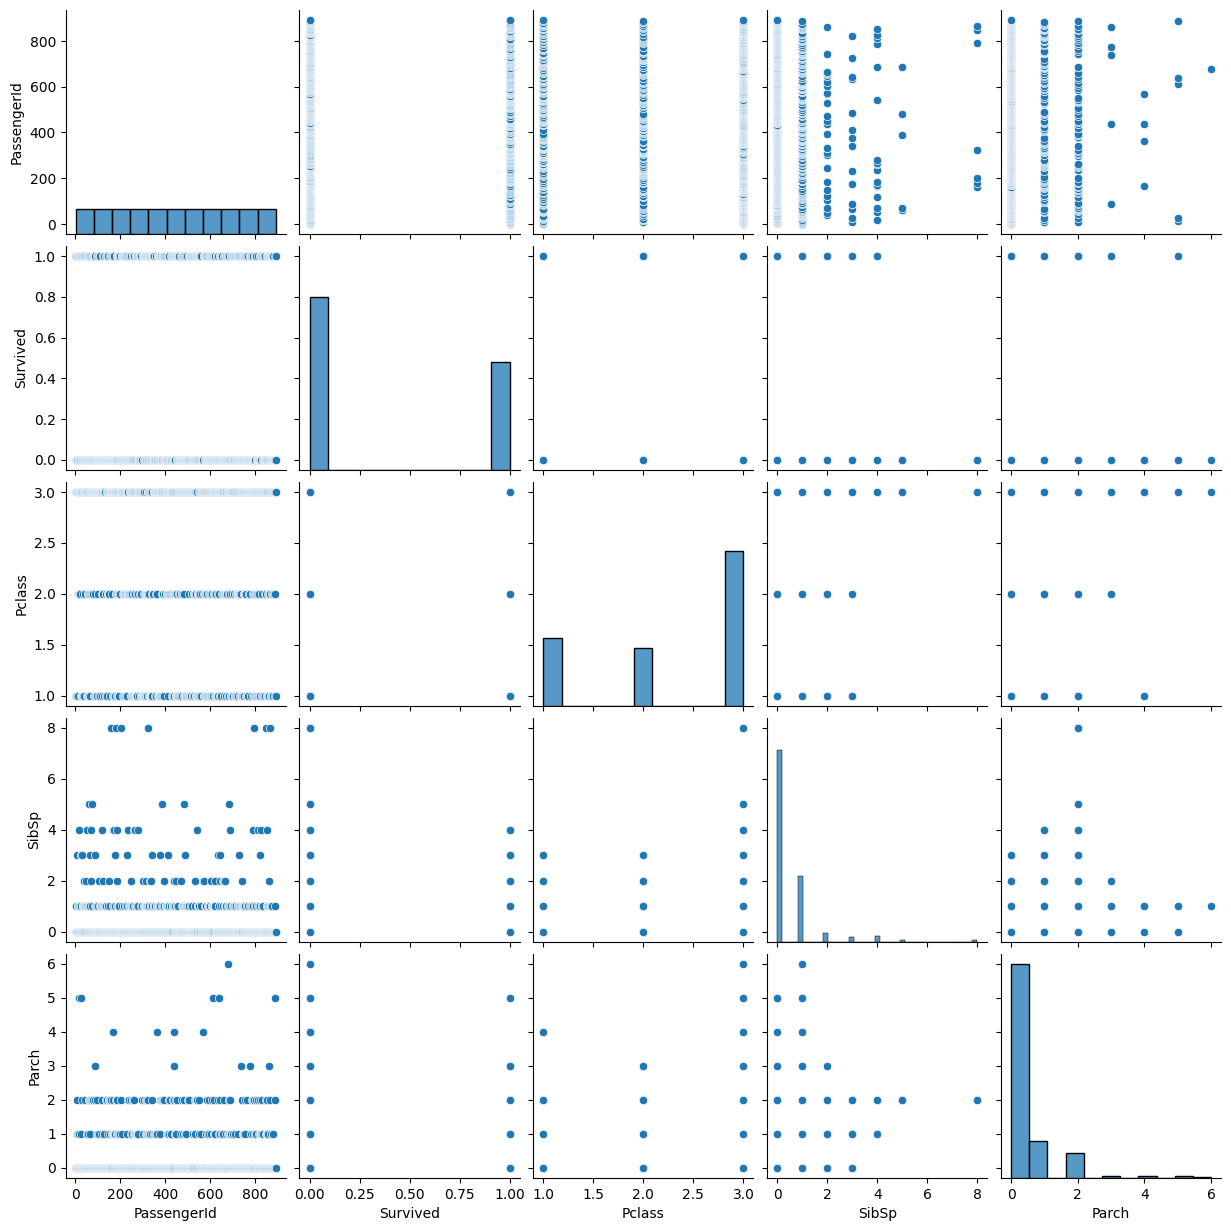

In [13]:
sns.pairplot(data)

### Handling Outliers

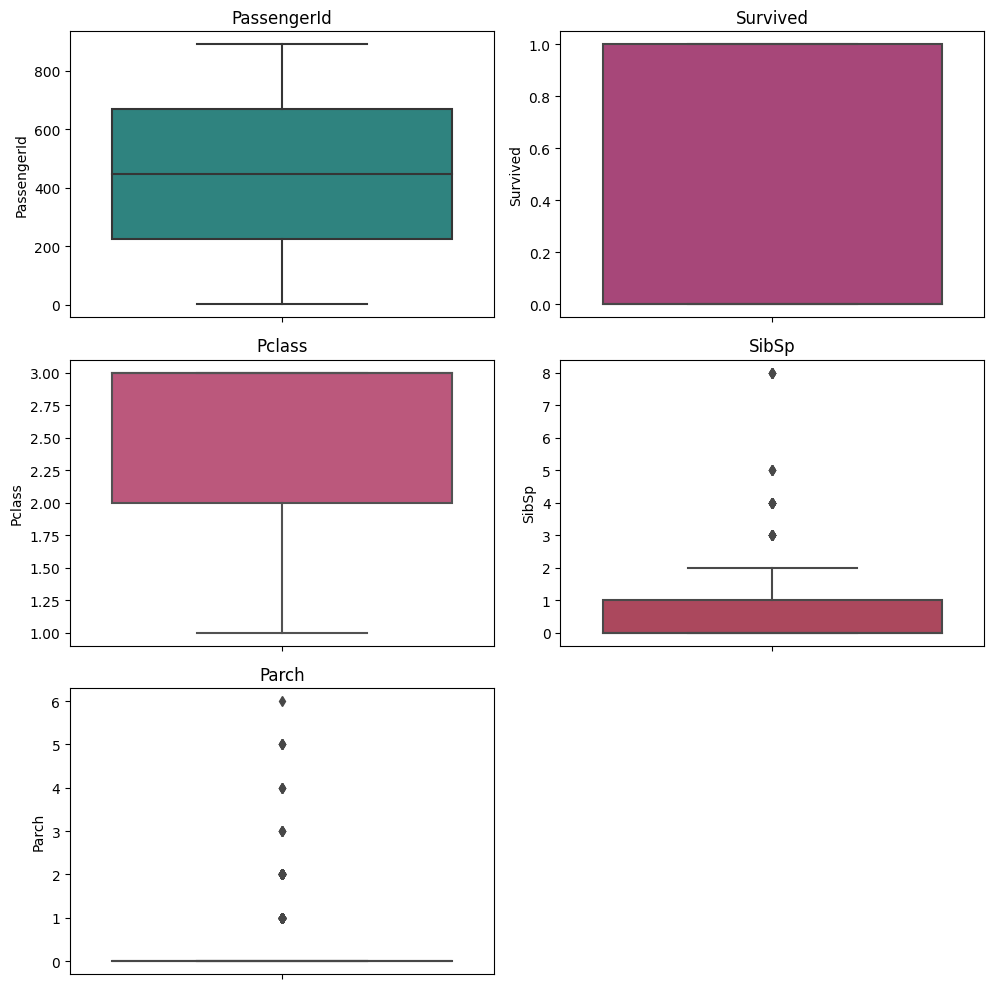

In [14]:
palettes = ["viridis", "magma", "plasma", "inferno", "cubehelix", "Spectral"]
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
ax = ax.flatten()
for i, col in enumerate(data.select_dtypes(include=["number"]).columns):
    sns.boxplot(y=data[col], ax=ax[i], palette=palettes[i % len(palettes)])
    ax[i].set_title(col)
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])
plt.tight_layout()
plt.show()


##### Let's see datadistribution

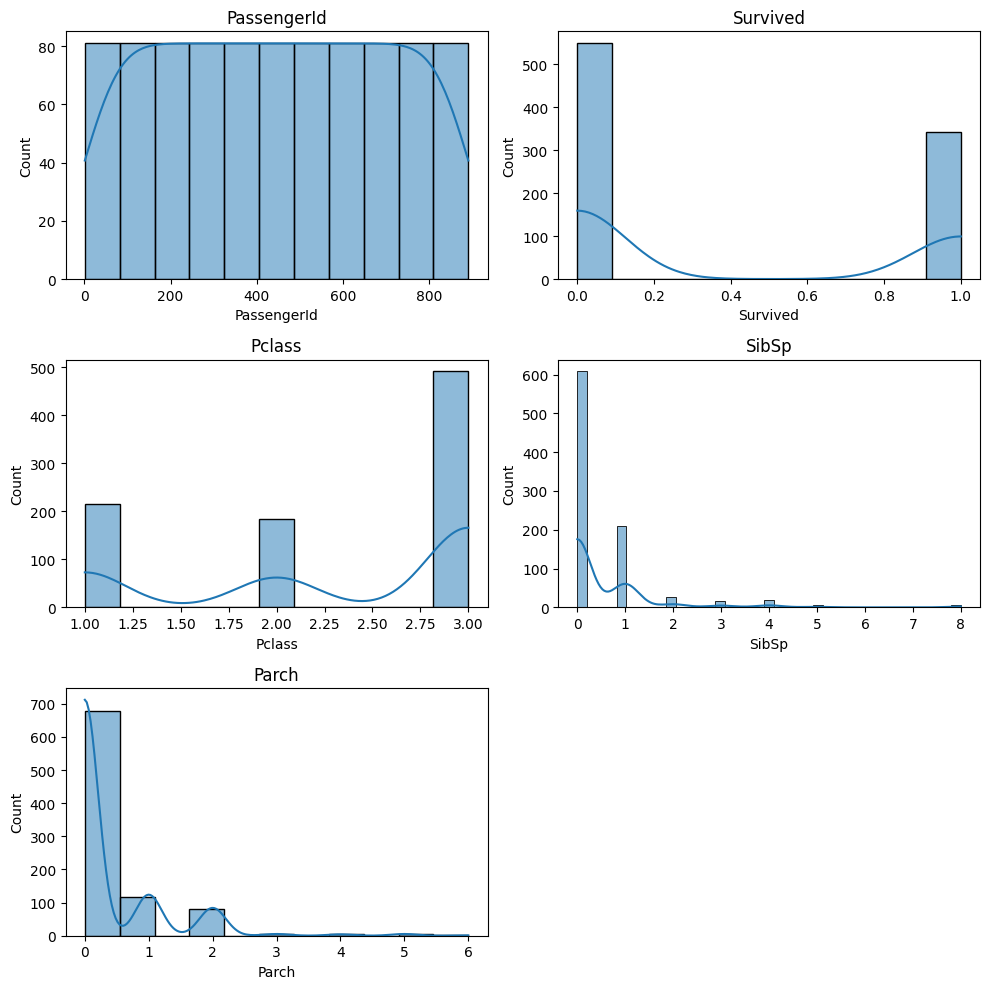

In [15]:
palettes = ["viridis", "magma", "plasma", "inferno", "cubehelix", "Spectral"]
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
ax = ax.flatten()
for i, col in enumerate(data.select_dtypes(include=["number"]).columns):
    sns.histplot(x=data[col], ax=ax[i], kde = True, palette=palettes[i % len(palettes)])
    ax[i].set_title(col)
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])
plt.tight_layout()
plt.show()

<AxesSubplot: >

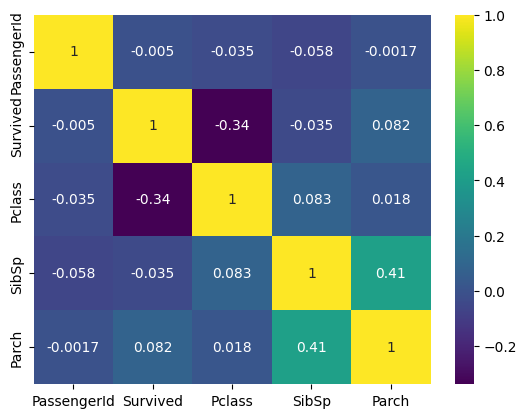

In [16]:
sns.heatmap(data.corr(), annot = True, cmap = "viridis")

### Feature Engineering

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["Sex"] = le.fit_transform(data["Sex"])
data["Embarked"] = le.fit_transform(data["Embarked"])

In [18]:
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,1,0,3,1,1,0,2
1,2,1,1,0,1,0,0
2,3,1,3,0,0,0,2
3,4,1,1,0,1,0,2
4,5,0,3,1,0,0,2


In [19]:
data.drop(columns = ["PassengerId"], inplace = True)

In [20]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,1,1,0,2
1,1,1,0,1,0,0
2,1,3,0,0,0,2
3,1,1,0,1,0,2
4,0,3,1,0,0,2


### Model Building

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], random_state=20, test_size = 0.2)

In [22]:
X_train, y_train = data.iloc[:,1:], data.iloc[:,0]

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_clf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_clf.fit(X_train, y_train)
best_params_clf = grid_search_clf.best_params_
best_rf_clf = grid_search_clf.best_estimator_
y_pred = best_rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8491620111731844
